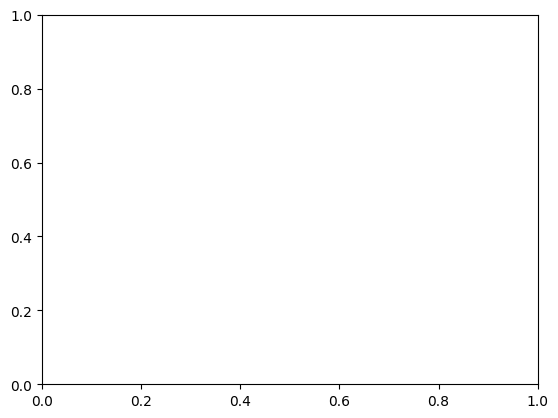

In [4]:
#question 1
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.integrate import solve_ivp
def forward_derivative(x,h):
    first_val=calculate(x)[0]
    second_val=calculate(x+h)[0]
    return (second_val-first_val)/h


def backward_derivative(x,h):
    first_val=calculate(x)[0]
    second_val=calculate(x-h)[0]
    return (first_val-second_val)/h
#function can be modified accoridng to the input function.
#The current input function is e^ -x 
def calculate(input):
    return numpy.exp([-input])

def double_derivative(x,h):
    forward_deriv=forward_derivative(x,h)
    backward_deriv=backward_deriv(x,h)
    current_val=calculate(x)
    return (forward_deriv-2*current_val+backward_deriv)/(h**2)



            

time_frame=np.linspace(0,1,100)

x_pos=np.linspace(0,1,50)

h=x_pos[1]-x_pos[0]

initial_u_val=np.exp(-x_pos)

initial_u_val[0]=initial_u_val[-1]=0





def f(t,x):
    next_value=x.copy()
    for j in range(1,49):
        next_value[j]=(x[j-1]-2*x[j]+x[j+1])/(h**2)
    next_value[0]=next_value[-1]=0
    return next_value

heat_over_time=solve_ivp(fun=f,t_span=(0,1),y0=initial_u_val.copy(),t_eval=time_frame)

fig,ax=plt.subplots()

def animate(frame_number):
    function_evaluation=heat_over_time.y[:,frame_number]
    ax.clear()
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.plot(x_pos,function_evaluation)
    ax.set_title(f'here')

animation=FuncAnimation(fig,animate,frames=len(time_frame))
plt.show()
        


    

In [5]:
python-3 sample


SyntaxError: invalid syntax (2884215444.py, line 1)

In [9]:
#question 3
import math as m
def calculate_nth(n,a,eps):
    a1=0
    b1=a
    c=(a1+b1)/2;
    while abs(c**n-a)>eps:
        c=(a1+b1)/2;
        if c**n>a:
            b1=c
        else:
            a1=c
    return (a1+b1)/2


print(calculate_nth(2,2,0.0001))
    
            
        
        
    

1.41424560546875


4
4.605170225446562


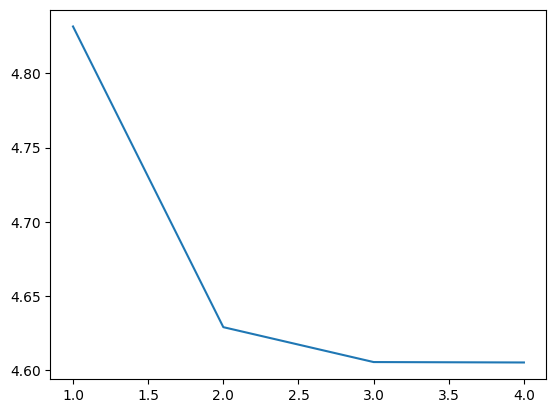

In [32]:
#question 4
#let the function be e^x-5

def calculate(x):
    return np.exp(x)-100
def newton_rapson(eps,init_val):
    res=calculate(init_val)
    count=0
    y_pos1=[]
    x_pos1=[]
    while abs(res)>eps:
        next_val=init_val-res/np.exp(init_val)
        init_val=next_val
        res=calculate(init_val)
        count+=1
        x_pos1.append(count)
        y_pos1.append(next_val)
    print(count)
    print(init_val)
    plt.plot(x_pos1,y_pos1)
    plt.show()
newton_rapson(0.001,4)        
    
    

In [7]:
def secant(eps,init_val,second_val):
    res=calculate(init_val)
    count=0
    while abs(res)>eps:
        term1=calculate(second_val)*(second_val-init_val)
        f_second_val=calculate(second_val)
        f_first_val=calculate(init_val)
        # print(f_second_val-f_first_val)
        term1=term1/(f_second_val-f_first_val)
        third_val=second_val-term1
        #print(third_val)
        init_val=second_val
        second_val=third_val
        res=calculate(third_val)
        print(res)
        count+=1
   # print(count)
    #print(init_val)
secant(0.01,0,1)    

1.0523930384268208e+25
-97.28171817154096
-97.28171817154096
nan


/tmp/ipykernel_8407/675735490.py:9: RuntimeWarning: invalid value encountered in scalar divide
  term1=term1/(f_second_val-f_first_val)


Number of iterations: 7
Root: 4.60516946790658


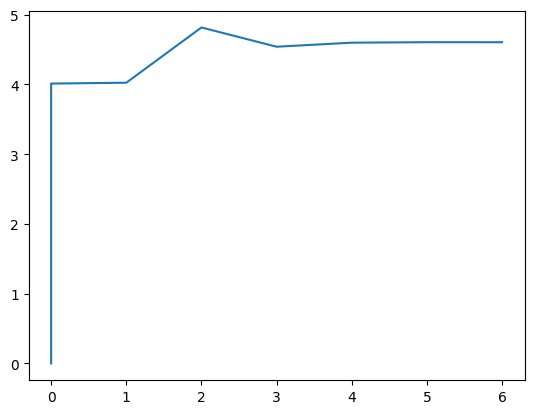

In [31]:
def secant(eps, init_val, second_val):
    res = calculate(init_val)
    count = 0
    y_plot=[0]
    x_plot=[0]
    while abs(res) > eps:
        f_second_val = calculate(second_val)
        f_first_val = calculate(init_val)
        # Check if the function values are very close to each other
        if abs(f_second_val - f_first_val) < 1e-15:
            # print(count)
            # print("Function values are too close. Exiting.")
            break
        term1 = f_second_val * (second_val - init_val) / (f_second_val - f_first_val)
        third_val = second_val - term1
        init_val = second_val
        second_val = third_val
        res = calculate(third_val)
        x_plot.append(count)
        y_plot.append(third_val)
        # print("Current approximation:", third_val)
        count += 1
        if count>100:
            break
    print("Number of iterations:", count)
    print("Root:", third_val)
    # print(x_plot)
    x_plot1=[2,4,3]
    y_plot1=[4,2.4,3]
    plt.plot(x_plot,y_plot)
    plt.show()

secant(0.01, 4, 10)


In [ ]:
#question 5


In [141]:
#question 6
#question4
import numpy as np
import matplotlib.pyplot as plt
class Polynomial:
    def __init__(self,coeff_list):
        self.coeff=coeff_list
    def __str__(self):
        print(f" Coefficients of the polynomial are:")
        print(self.coeff)
        return ""
    def __add__(self,other):
        new_coeff=[0]*len(self.coeff)
        for i in range(len(self.coeff)):
            new_coeff[i]=self.coeff[i]+other.coeff[i]
        return Polynomial(new_coeff)
    
    def __sub__(self,other):
        new_coeff=[0]*len(self.coeff)
        for i in range(len(self.coeff)):
            new_coeff[i]=self.coeff[i]-other.coeff[i]
        return Polynomial(new_coeff)
    def __mul__(self,other):
        new_coeff=[0]*(len(self.coeff)+len(other.coeff)-1)
        for i in range(len(self.coeff)):
            for j in range(len(other.coeff)):
                new_coeff[i+j]+=self.coeff[i]*other.coeff[j]
#                 print(new_coeff[i])
        return Polynomial(new_coeff)
    def __rmul__(self,other):
        new_coeff=[0]*len(self.coeff)
        if isinstance(other,int):
            for i in range(len(self.coeff)):
                new_coeff[i]=self.coeff[i]*other
            return Polynomial(new_coeff)    
#         else:
#             for i in range(len(self.coeff)):
#                 new_coeff[i]=self.coeff[i]*other.coeff[i]
#             return Polynomial(new_coeff)

    def __getitem__(self,num):
        val=0
        for i in range(len(self.coeff)):
            val+=self.coeff[i]*(num**i)
        return val  
    def __setitem__(self,index,num):
        self.coeff[index]=num
        
        
        
    
    def show(self,left,right):
        #dividing the indexes in the range of 10
        div=(right-left)/100
        output=[0]*101
        inputt=[0]*101
        for i in range(101):
            output[i]=self.__getitem__(left+div*i)
            inputt[i]=left+div*i
        plt.plot(inputt,output)
        plt.show()
            
    def  fitviamatrixmethod(self,mapping):
        degree=len(mapping)
        output_list=[mapping[i][1] for i in range(len(mapping))]
        input_matrix=[]
        
        for i in range(len(mapping)):
            output_row=[]
            for j in range(degree):
                output_row.append(mapping[i][0]**j)
            input_matrix.append(output_row)
        coeff=np.linalg.solve(input_matrix,output_list)
        p5=Polynomial(coeff)
        return p5.show(-1,3)
    
    
    def fitvialagrangepoly(self,mapping):
        degree=len(mapping)
        p_0=Polynomial([0]*degree)
        for i in range(degree):
            p0=Polynomial([1])
            denom=1
            for j in  range(degree):
                if(i!=j):
                    p1=Polynomial([mapping[j][0],1])
                    p0=p0*p1
                    denom*=(mapping[i][0]-mapping[j][0])
#             print(p0)       
            for j in  range(degree):
                p0[j]=p0[j]/denom
                p0[j]*=mapping[i][1]
#                 print(p0[j])
#             print(p0)    
            p_0=p_0+p0
            print(p_0)   
        return p_0.show(-10,10)

    def calculate_aberth(self,num,index,n,init_val):
        fun_val=self.__getitem__(num)
        # print("hai",fun_val)
        f_dy=self.__getitem__(num+0.001)
        # print(f_dy)
        fun_deriv_val=(f_dy-fun_val)/0.001
        # print("hai",fun_deriv_val)
        numerator=fun_deriv_val/fun_val
        denom_summation=0
        # print(numerator,"num")
        for i in range(n):
            if i!=index:
                denom_summation+=1/(num-init_val[i])
        # print(denom_summation)        
        # denom=(1-numerator)*denom_summation
        term=numerator-denom_summation
        # print(1/term,"this is term inverted")
        return 1/term
        
        
        
            
                
    def print_roots(self,init_list):
        n1=len(init_list)
        list1=[0]*n1
        for i in range(5):
            offset=np.array(list1)
            # print(offset,"each time")
            for i in range(len(init_list)):
                x=self.calculate_aberth(init_list[i],i,n1,init_list)
                # print(init_list[i],"before")
                init_list[i]-=x
                # print(init_list[i],"after")
            init_list=init_list-offset
            # print(offset)
            # print(init_list)
        print(init_list)    
        return init_list
c=Polynomial([4,-4,1])
print(c[2])

        
        
                    
        
                    
                    
                    
                    
        
        
        
        
        
        
            
                
            
        

    
    
    
        
    

0


In [142]:
print(c)
c.print_roots([0,10])

 Coefficients of the polynomial are:
[4, -4, 1]

[1.99583665 2.00281287]


array([1.99583665, 2.00281287])

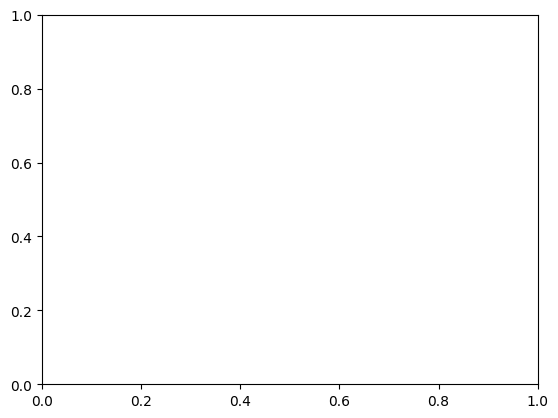

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from matplotlib.animation import FuncAnimation
x=np.linspace(0,1,50)
h=x[1]-x[0]
time_frame=np.linspace(0,1,100)


init_list=x.copy()
for i in range(len(x)):
    init_list[i]=np.exp(init_list[i])
init_list[0]=init_list[-1]=0

def rod_calculator(t,y):
    y=x.copy()
    for i in range(1,49):
        y[i]=(x[i+1]+x[i-1]-2*x[i])/(h**2)
    return y

heat_solver=solve_ivp(fun=rod_calculator,t_span=(0,1),y0=init_list,t_eval=time_frame)

fig,ax=plt.subplots()

def animate(time_frame):
    evalt=heat_solver.y[:,time_frame]
    plt.plot(x,evalt)

animation=FuncAnimation(fig,animate,frames=len(time_frame))
plt.show()
    
    
    

In [16]:
#question 5
def calculate_jacobian(x1,x2,x3):
    matrix=[]
    matrix.append([3,np.sin(x2*x3)*x3,np.sin(x2*x3)*x2])
    matrix.append([8*x1,-1250*x2,2])
    matrix.append([-np.exp(-1*x1*x2)*x2,-np.exp(-1*x1*x2)*x1,20])
    print(matrix)
    return np.linalg.inv(matrix)


def calculate_vectors(x1,x2,x3):
    fun_mat=[]
    fun_mat.append([3*x1-np.cos(x2*x3)-1.5])
    fun_mat.append([4*x1*x1-625*x2*x2+2*x3-1])
    fun_mat.append([20*x3+np.exp(-1*x1*x2)+9])
    return fun_mat

def find_ans(a,b,c):
    for i in range(400):
        mat1=calculate_jacobian(a,b,c)
        print(mat1,"mat1")
        mat2=calculate_vectors(a,b,c)
        print(mat2,"mat2")
        mat3=np.matmul(mat1,mat2)
        print(mat3,"mat3")
        a=(a-mat3[0])[0]
        b=(b-mat3[1])[0]
        c=(c-mat3[2])[0]
        # print(a,b,c)
    print(a,b,c)

find_ans(1.5,0,0)

        
    

    
        

[[3, 0.0, 0.0], [12.0, 0, 2], [-0.0, -1.5, 20]]
[[  0.33333333   0.           0.        ]
 [-26.66666667   6.66666667  -0.66666667]
 [ -2.           0.5         -0.        ]] mat1
[[2.0], [8.0], [10.0]] mat2
[[ 0.66666667]
 [-6.66666667]
 [ 0.        ]] mat3
[[3, 0.0, 0.0], [6.666666666666667, -8333.333333333332, 2], [-0.025772800929818714, -0.0032216001162273396, 20]]
[[ 3.33333333e-01  1.79897980e-17  1.13690416e-18]
 [ 2.66769768e-04 -1.20000005e-04  1.20000005e-05]
 [ 4.29589653e-04 -1.93296014e-08  5.00000019e-02]] mat1
[[0.0], [-27775.999999999993], [9.003865920139473]] mat2
[[-4.99674393e-13]
 [ 3.33322818e+00]
 [ 4.50730212e-01]] mat3
[[3, 0.44967885960914294, -3.325663064266792], [6.666666666670665, -4166.798114269607, 2], [-0.2072434565379169, -0.05180922968673769, 20]]
[[ 3.37126367e-01  3.56855400e-05  5.60548668e-02]
 [ 5.41062604e-04 -2.39935455e-04  1.13963141e-04]
 [ 3.49476328e-03 -2.51763821e-07  5.05811454e-02]] mat1
[[0.9317382368658396], [-6944.006292679362], [0.04